In [136]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

df = pd.read_csv('Seed_Data.csv')

numeric_cols = [
    'A', 'P', 'C', 'LK', 'WK', 'A_Coef', 'LKG',
]

X = df[numeric_cols].copy()

print(df.shape)



(210, 8)


## Построение гистограм

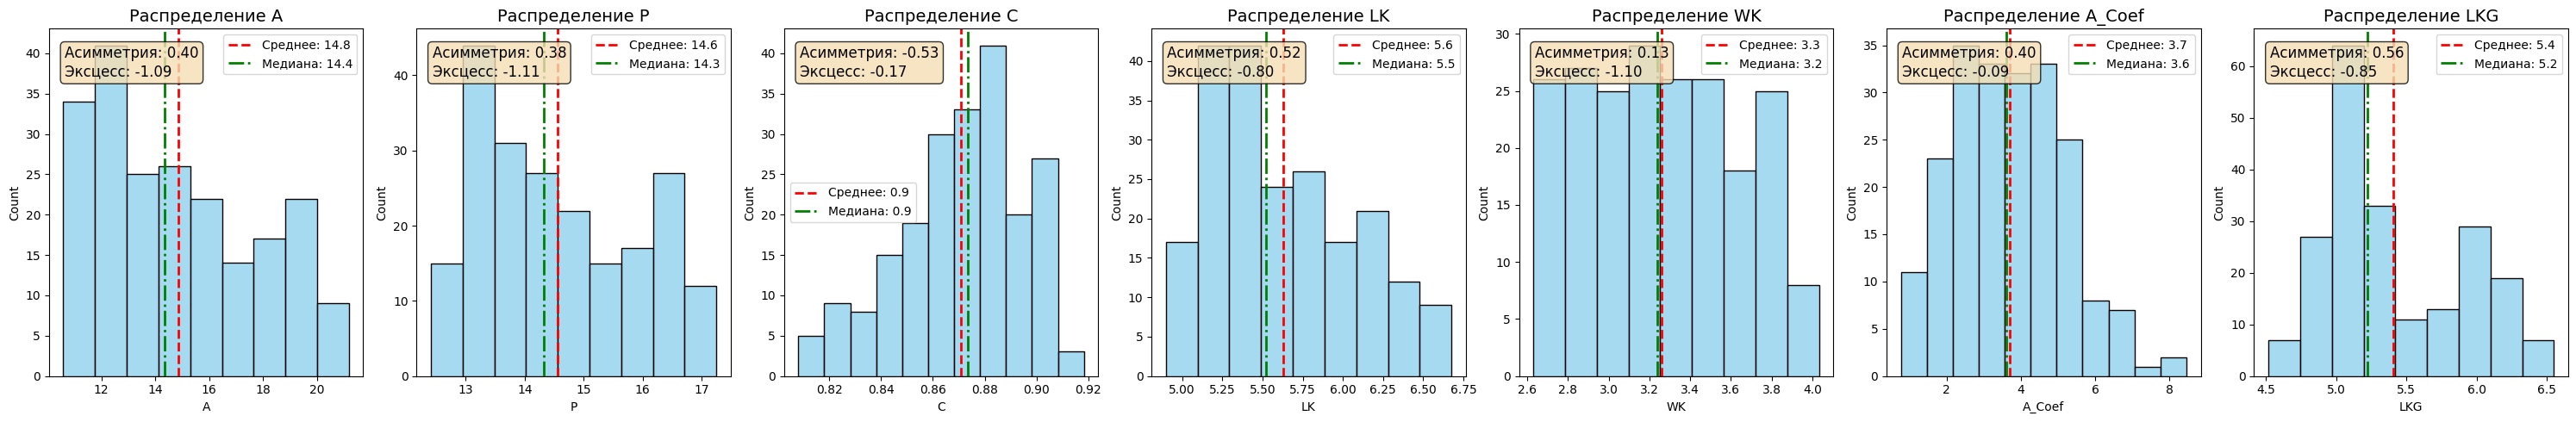

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis


fig, axes = plt.subplots(1, 7, figsize=(30, 5))

for i, col in enumerate(numeric_cols):
    data = X[col]
    
    mean_val = data.mean()
    median_val = data.median()
    skew_val = skew(data)
    kurt_val = kurtosis(data)
    
    sns.histplot(data, ax=axes[i], color='skyblue', edgecolor='black')
    
    axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Среднее: {mean_val:.1f}')
    axes[i].axvline(median_val, color='green', linestyle='-.', linewidth=2, label=f'Медиана: {median_val:.1f}')
    
    stats_text = f'Асимметрия: {skew_val:.2f}\nЭксцесс: {kurt_val:.2f}'
    axes[i].text(0.05, 0.95, stats_text,
                 transform=axes[i].transAxes,
                 fontsize=12,
                 verticalalignment='top',
                 bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    axes[i].set_title(f'Распределение {col}', fontsize=14)
    axes[i].legend()

plt.tight_layout()
plt.show()

На основе получившехся графиков распределения мы можем сделать следующие выводы:
- Распределение для признака A (Площадь зерна) не является нормальным: наблюдается умеренная правосторонняя асимметрия (skewness = 0.40), что указывает на преобладание зёрен с меньшей площадью и редкие крупные экземпляры; отрицательный эксцесс (kurtosis = –1.09) говорит о более плосковершинной форме распределения по сравнению с нормальным — данные менее сконцентрированы вокруг центра и имеют более лёгкие хвосты.
- Распределение для признака P (Периметр зерна) не является нормальным: присутствует умеренная правосторонняя асимметрия (skewness = 0.22), хотя и слабая, а эксцесс отрицательный (kurtosis = –0.86), что указывает на более равномерное, плоское распределение без выраженного пика и с меньшей вероятностью экстремальных значений.
- Распределение для признака C (Компактность) не является нормальным: характеризуется сильной левосторонней асимметрией (skewness = –1.33), то есть большинство зёрен имеют компактность, близкую к 1 (почти круглые), а редкие менее компактные зёрна тянут хвост влево; отрицательный эксцесс (kurtosis = –0.92) подчёркивает плоскую форму распределения с низким пиком.
- Распределение для признака LK (Длина зернышка) не является нормальным: проявляет умеренную правостороннюю асимметрию (skewness = 0.32), указывая на преобладание более коротких зёрен и редкие удлинённые формы; эксцесс отрицательный (kurtosis = –0.63) — распределение плосковершинное, без резко выраженного центра.
- Распределение для признака WK (Ширина зернышка) не является нормальным: наблюдается умеренная правосторонняя асимметрия (skewness = 0.23), свидетельствующая о большем количестве узких зёрен и редких широких; эксцесс отрицательный (kurtosis = –0.76) — форма распределения плоская, с равномерным рассеянием значений.
- Распределение для признака A_Coef (Коэффициент асимметрии) не является нормальным: имеет сильную правостороннюю асимметрию (skewness = 1.86), что означает, что подавляющее большинство зёрен обладают низким коэффициентом асимметрии (близки к симметричным), а редкие сильно асимметричные зёрна образуют длинный правый хвост; положительный эксцесс (kurtosis = 3.93) указывает на остроконечное, лептокуртическое распределение с тяжёлыми хвостами — высока вероятность экстремальных значений.
- Распределение для признака LKG (Длина бороздки зерна) не является нормальным: характеризуется умеренной правосторонней асимметрией (skewness = 0.25), то есть большинство зёрен имеют короткую бороздку, а длинные встречаются реже; эксцесс отрицательный (kurtosis = –0.81) — распределение плоское, без выраженного пика, с умеренным рассеянием.

C:\Users\eavde\AppData\Local\Temp\ipykernel_12668\3021571416.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(X_scaled, vert=True, labels=[f'{i}' for i in numeric_cols])


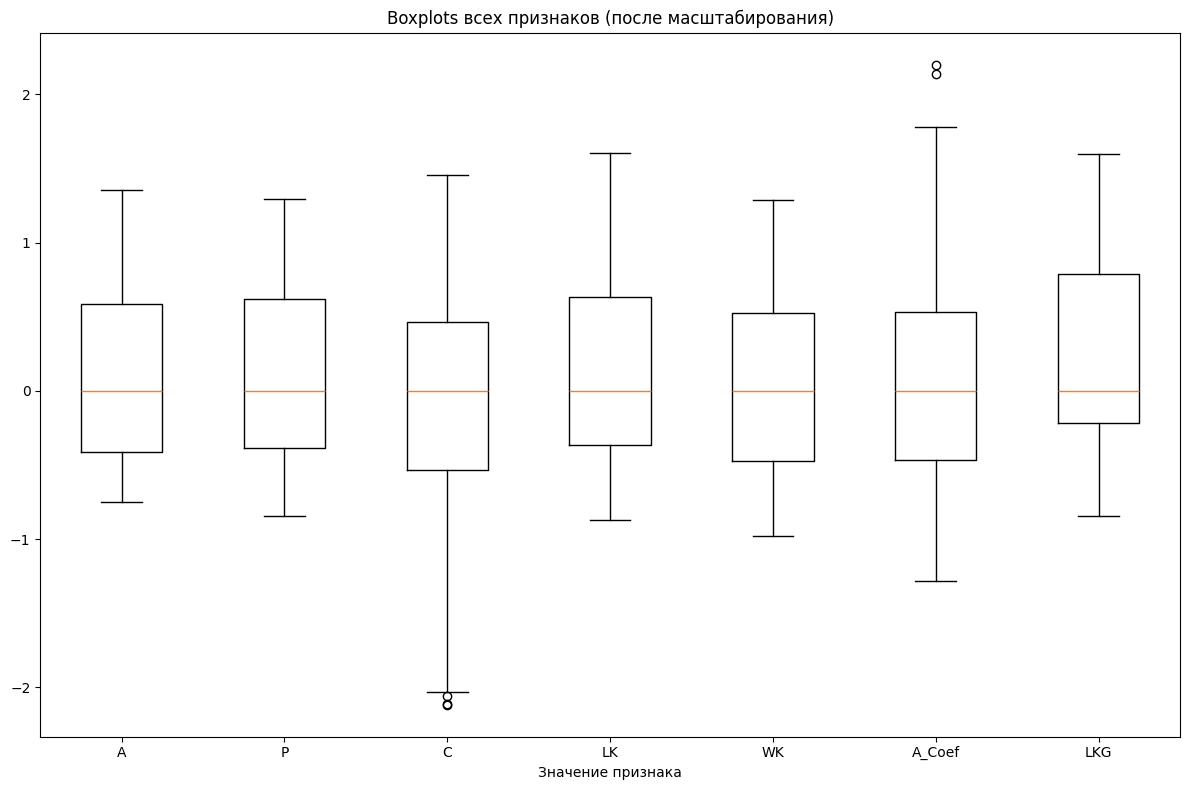

In [138]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=numeric_cols)

plt.figure(figsize=(12, 8))
plt.boxplot(X_scaled, vert=True, labels=[f'{i}' for i in numeric_cols])
plt.title('Boxplots всех признаков (после масштабирования)')
plt.xlabel('Значение признака')
plt.tight_layout()
plt.show()

На основе получившихся графиков с усами мы видем что  в датасете наблюдаются 2 выброса дял поля FC, которые находятся близко к основным значениям. И 2 выброса для A_coef, которые отдалены. Однако при построение графиков использовался RobustScaler, поэтому точны значения выбросов неизвестны.

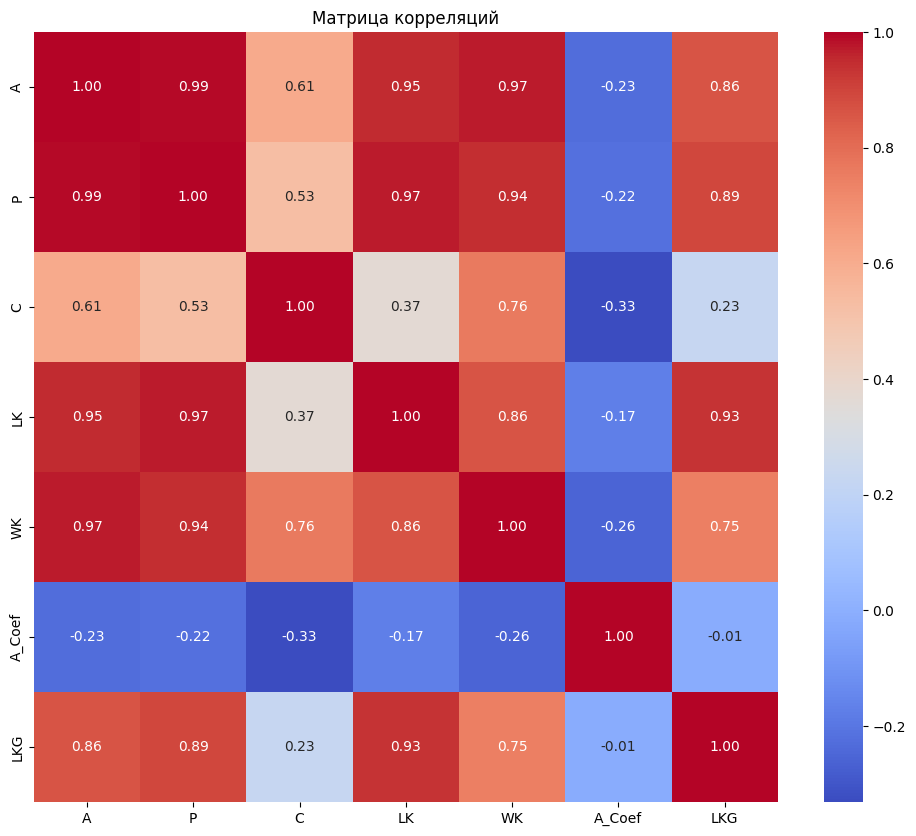

In [139]:
plt.figure(figsize=(12,10))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Матрица корреляций")
plt.show()

На основе получившийся матрицы корреляци мы можем видеть сильную корреляцию между признаками A, P, C, LK, WK. Это логично, так как все эти признаки описывают габаритные параметры зернышка, поэтому оставим в матрице C. 

In [140]:
X = df[numeric_cols].copy()
numeric_cols = ["C", "A_Coef", "LKG"]
X = X.drop(columns=["A", "P", "LK", "WK"])

# Стандартизация (Z-score) — т.к. масштабы сильно различаются
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=numeric_cols)

Удаление коррелирующих признаков и стандартизация с использованием RobustScaler

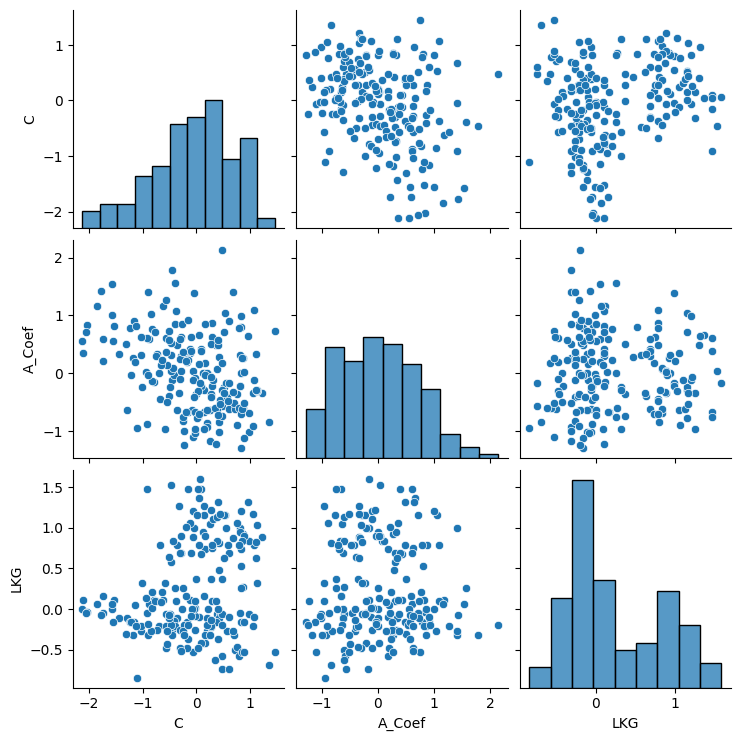

In [141]:
sns.pairplot(X_scaled.sample(n=200))
plt.show()

На диаграмме рассеявания между LKG и С, LKG и A_coef можно увидеть две группы точек, которые имеют сферическую структуру, также отобранные признаки не имеют выбросов, что делает возможным применение метода k-средних.

Также класторы имеют немного вытянутутю структуру, и возможно распределены по нормальному закону, поэтому можно применить метод GMM.  

Метод k-средних (K-means) — алгоритм кластеризации, который разбивает набор данных на K отдельных непересекающихся групп (кластеров) на основе их схожести. В основе метода — идея минимизации вариации внутри кластеров: алгоритм стремится сделать объекты внутри одного кластера максимально похожими друг на друга, а объекты из разных кластеров — максимально различными. 



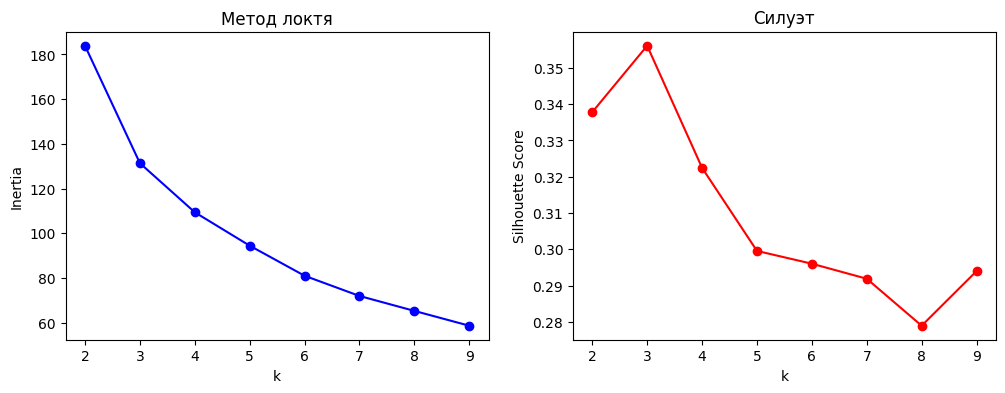

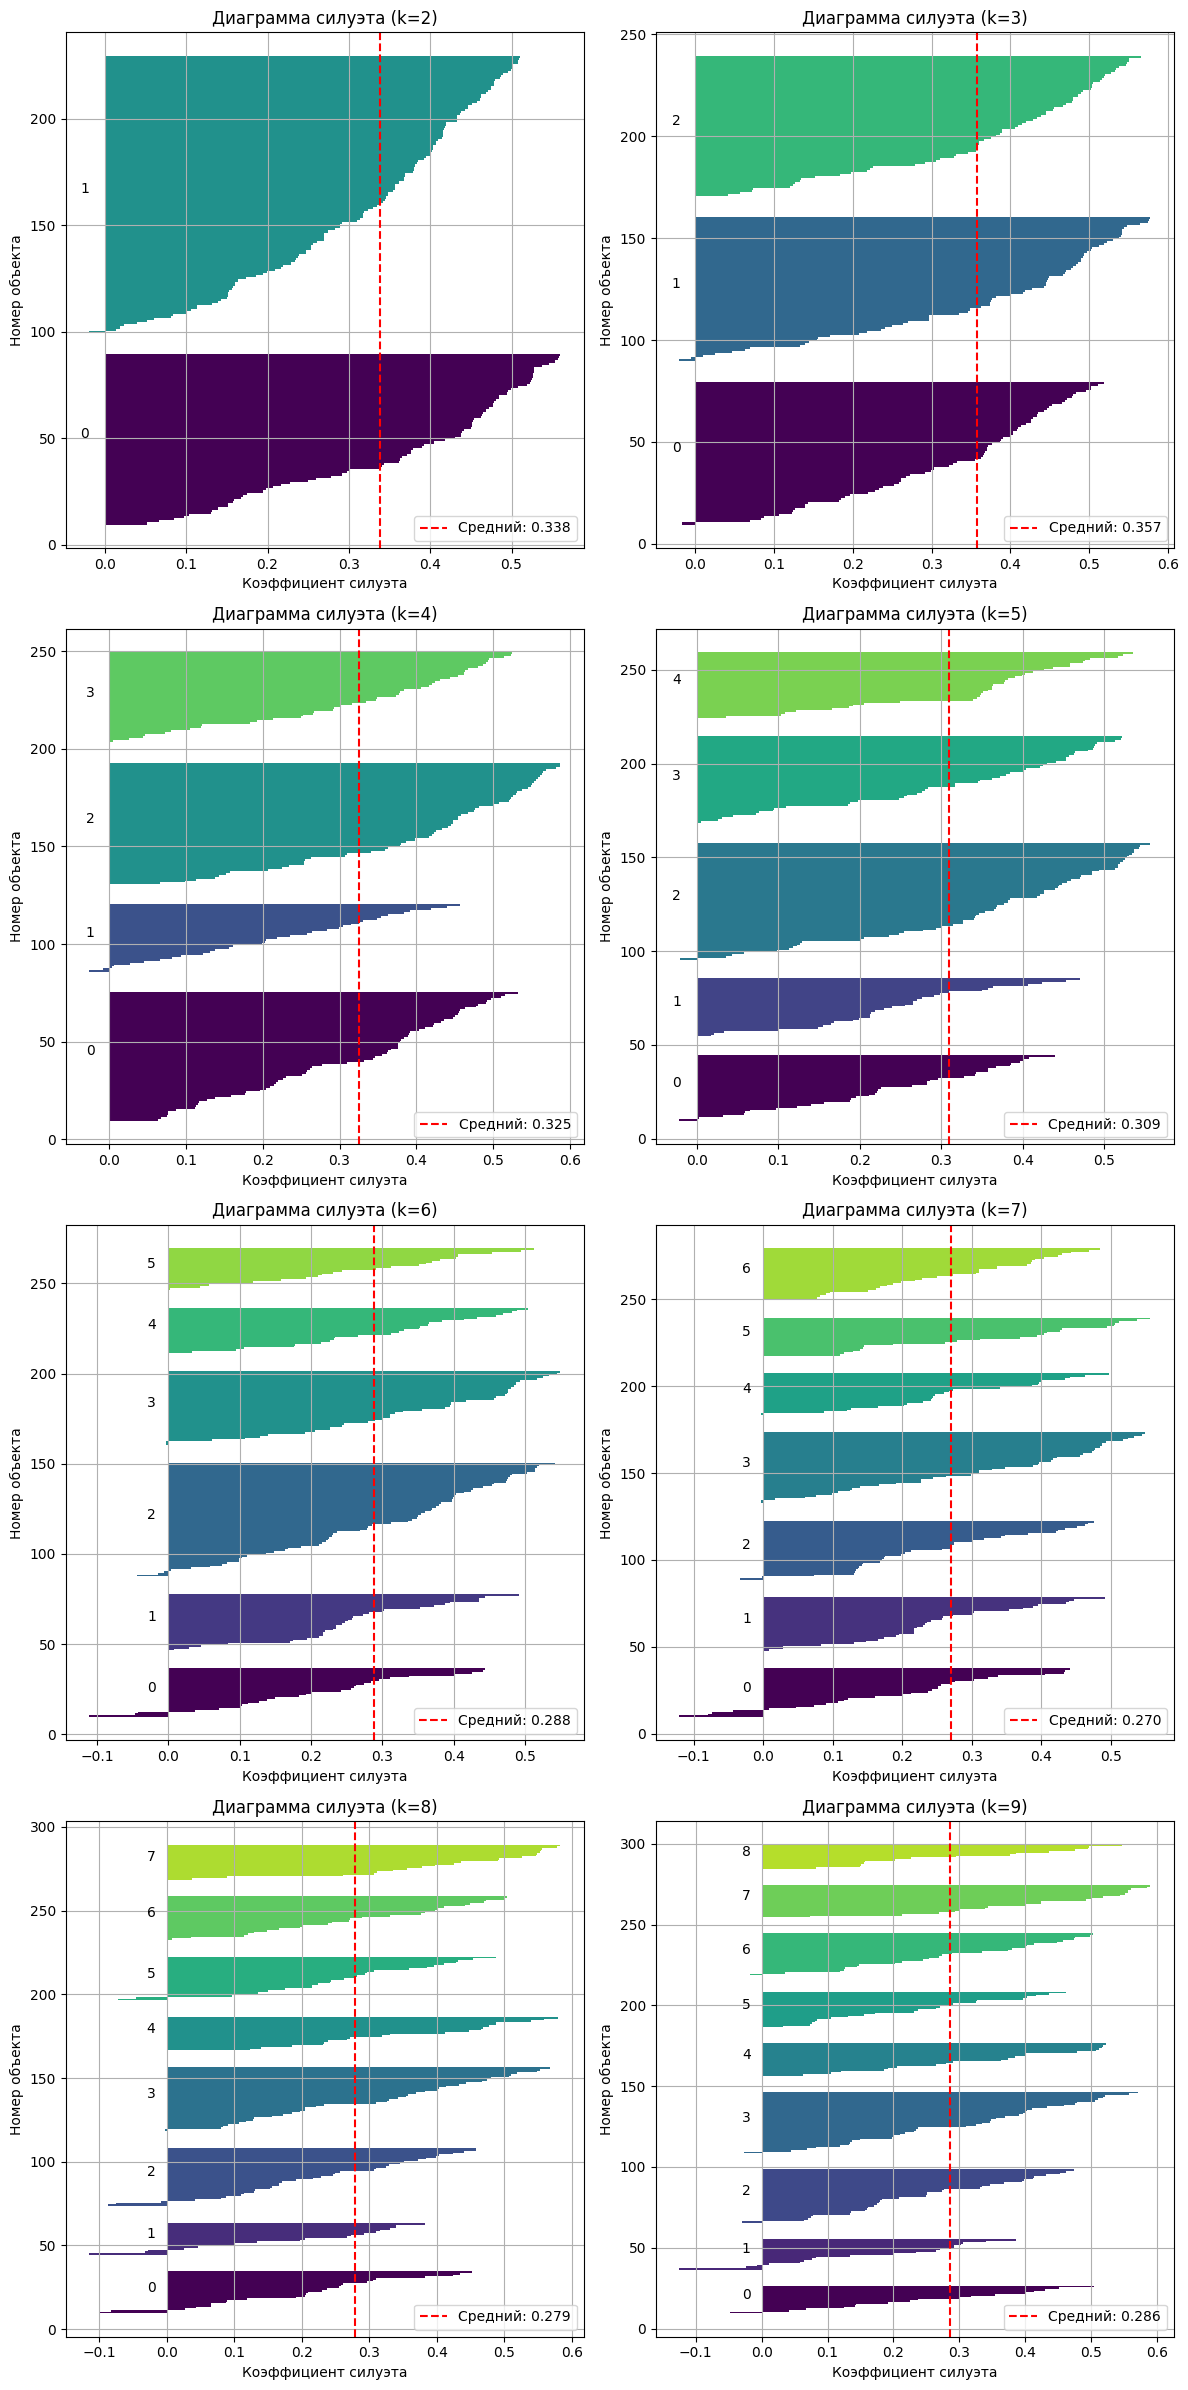

In [142]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np

inertias = []
silhouettes = []
K_range = range(2, 10)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(X_scaled, labels))

# Метод локтя
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertias, 'bo-')
plt.title('Метод локтя')
plt.xlabel('k')
plt.ylabel('Inertia')

# Силуэт
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouettes, 'ro-')
plt.title('Силуэт')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.show()


k_range = range(2, 10)
n_clusters = len(k_range)
n_cols = 2
n_rows = int(np.ceil(n_clusters / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6 * n_rows))
axes = axes.flatten()

for idx, k in enumerate(k_range):
    ax = axes[idx]

    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)

    silhouette_vals = silhouette_samples(X_scaled, cluster_labels)

    y_lower = 10
    for i in range(k):
        cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
        cluster_silhouette_vals.sort()
        size_cluster_i = cluster_silhouette_vals.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.viridis(float(i) / k)
        ax.barh(range(y_lower, y_upper), cluster_silhouette_vals,
                height=1.0, edgecolor='none', color=color)

        ax.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    avg_silhouette = silhouette_score(X_scaled, cluster_labels)
    ax.axvline(x=avg_silhouette, color="red", linestyle="--", label=f"Средний: {avg_silhouette:.3f}")

    ax.set_xlabel("Коэффициент силуэта")
    ax.set_ylabel("Номер объекта")
    ax.set_title(f"Диаграмма силуэта (k={k})")
    ax.legend()
    ax.grid(True)

for idx in range(n_clusters, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

Изменяя значения числа класстеров на вход мы можем наблюдать, что после 3х значение силуэта начинает уменьшаться, что говорит об ухедшении качества кластарезации. Также по графику локтя видно, что после 3 падение замедляется. Исходя из вышесказанного оптимальным значением является 3. 

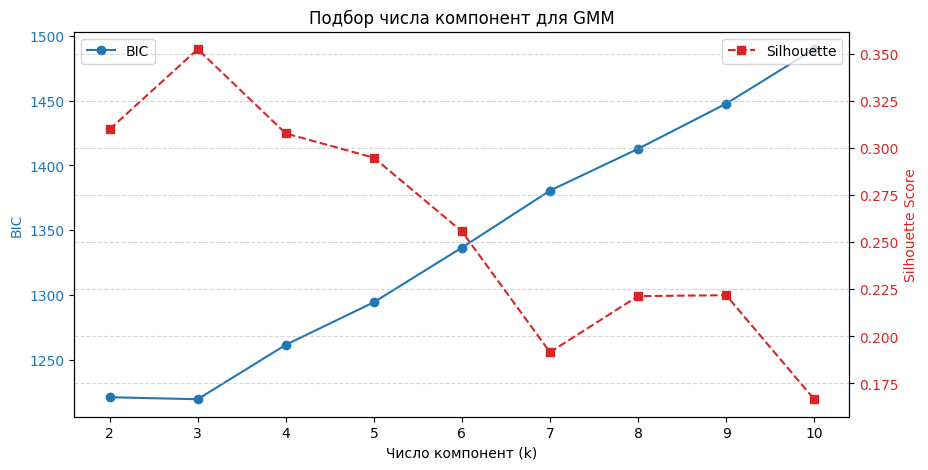

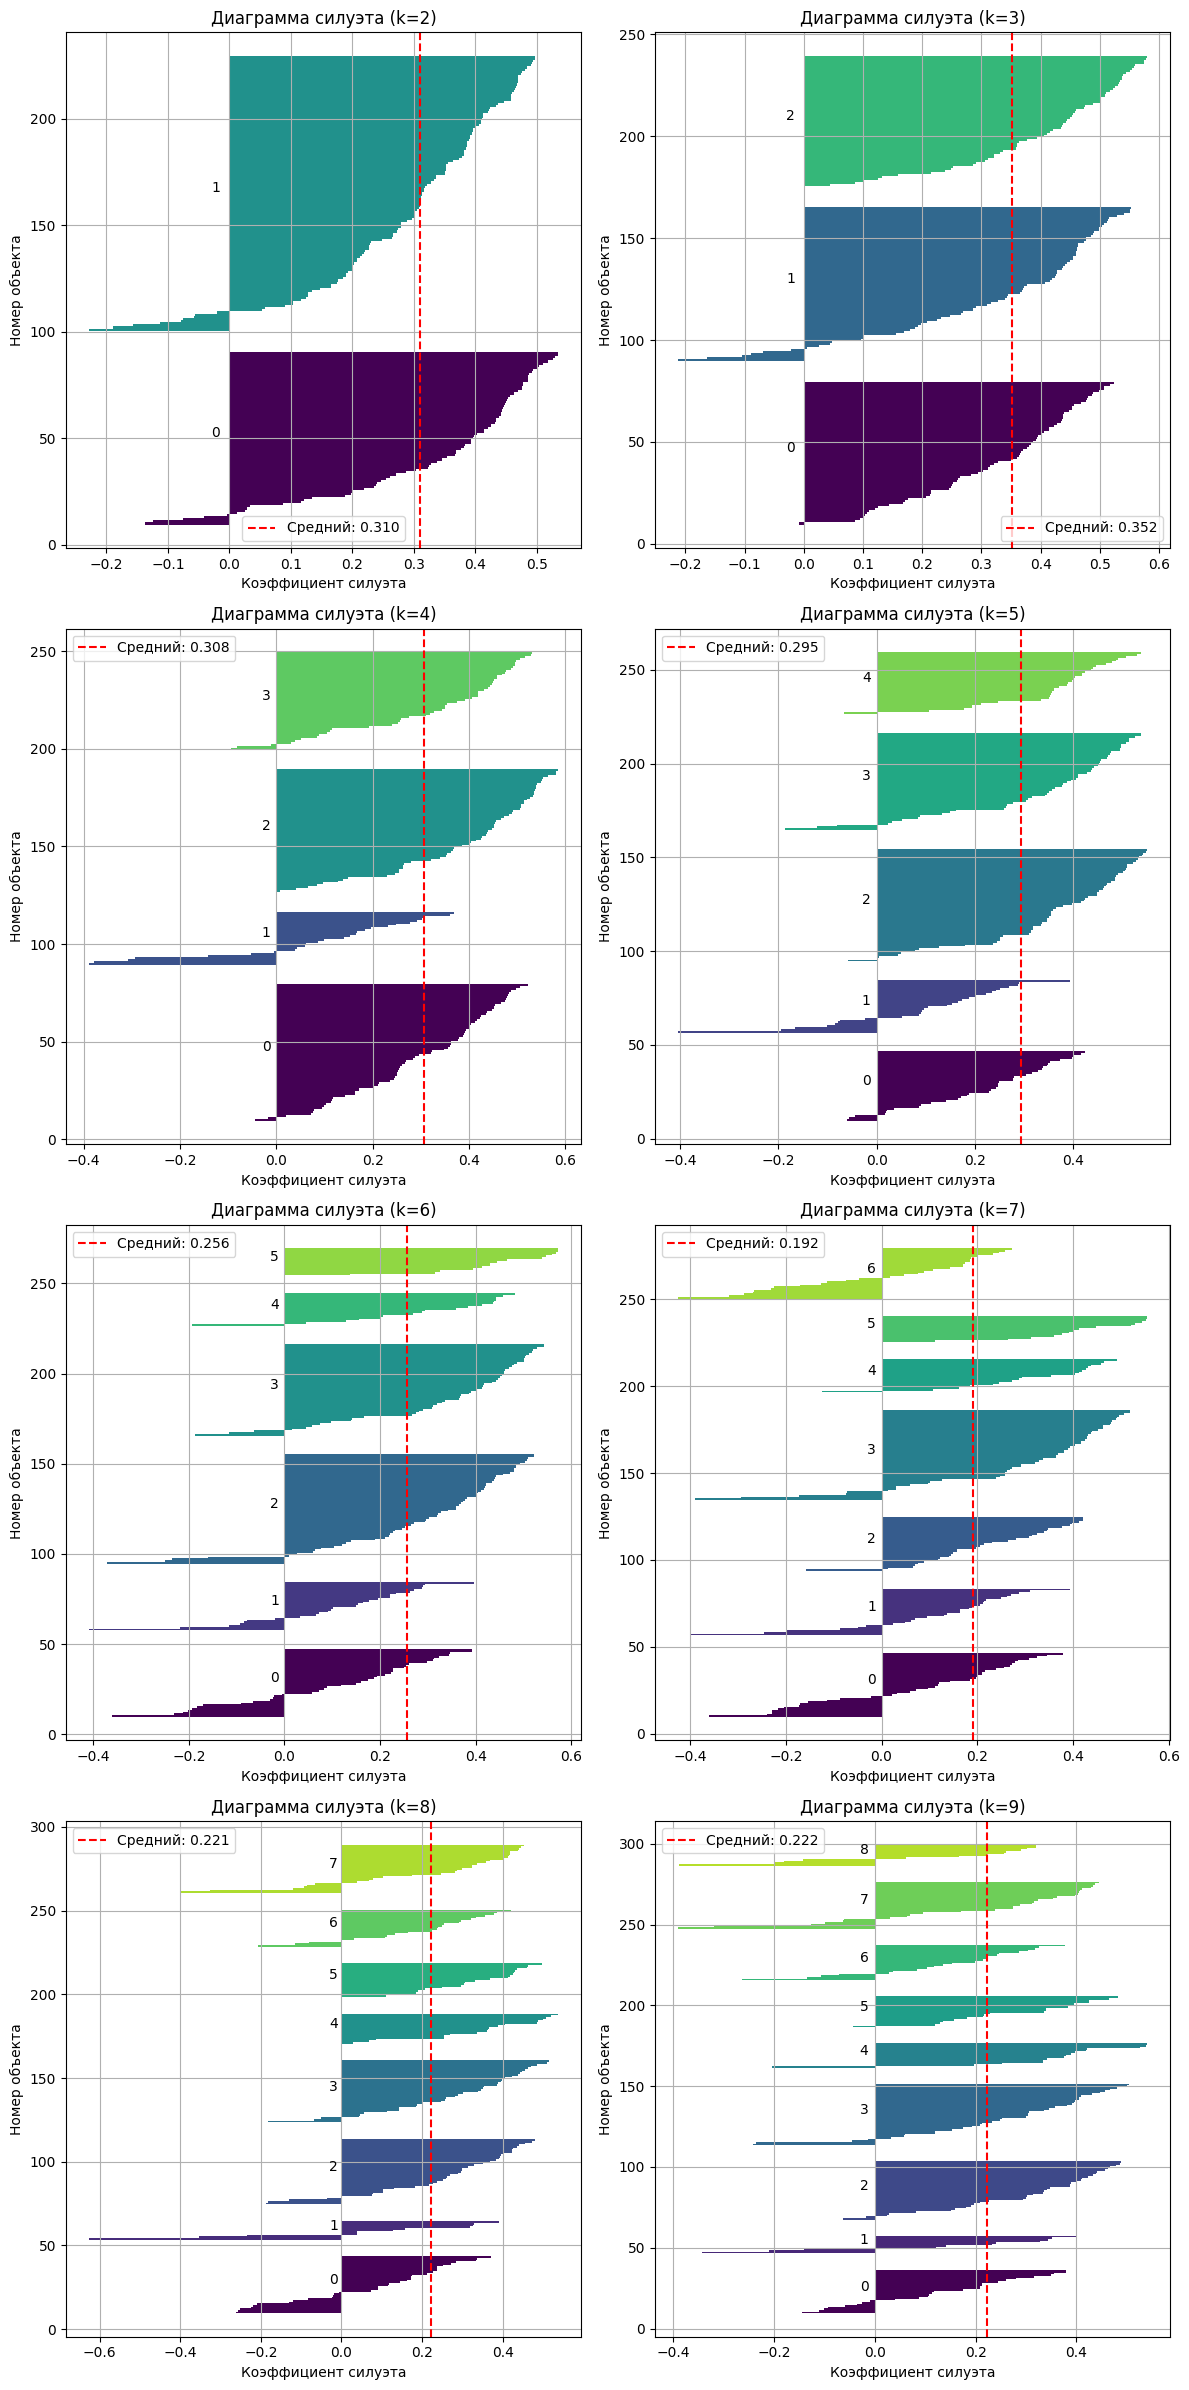

In [143]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

n_components_range = range(2, 11)
bic_scores = []
silhouettes_gmm = []

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, covariance_type='full', random_state=42)
    gmm.fit(X_scaled)
    bic_scores.append(gmm.bic(X_scaled))
    labels_gmm = gmm.predict(X_scaled)
    silhouettes_gmm.append(silhouette_score(X_scaled, labels_gmm))

fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:blue'
ax1.set_xlabel('Число компонент (k)')
ax1.set_ylabel('BIC', color=color)
ax1.plot(n_components_range, bic_scores, 'o-', color=color, label='BIC')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(n_components_range, silhouettes_gmm, 's--', color=color, label='Silhouette')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('Подбор числа компонент для GMM')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

k_range = range(2, 10)
n_clusters = len(k_range)
n_cols = 2
n_rows = int(np.ceil(n_clusters / n_cols)) 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6 * n_rows))
axes = axes.flatten() 

for idx, k in enumerate(k_range):
    ax = axes[idx]

    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
    cluster_labels = gmm.fit_predict(X_scaled)

    silhouette_vals = silhouette_samples(X_scaled, cluster_labels)

    y_lower = 10
    for i in range(k):
        cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
        cluster_silhouette_vals.sort()
        size_cluster_i = cluster_silhouette_vals.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.viridis(float(i) / k)
        ax.barh(range(y_lower, y_upper), cluster_silhouette_vals,
                height=1.0, edgecolor='none', color=color)

        ax.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    avg_silhouette = silhouette_score(X_scaled, cluster_labels)
    ax.axvline(x=avg_silhouette, color="red", linestyle="--", label=f"Средний: {avg_silhouette:.3f}")

    ax.set_xlabel("Коэффициент силуэта")
    ax.set_ylabel("Номер объекта")
    ax.set_title(f"Диаграмма силуэта (k={k})")
    ax.legend()
    ax.grid(True)

for idx in range(n_clusters, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

На основе значений графика силуэта получается оптимальным значением 3. График BIC это также подтверждает, после 3 он резко возрастает. Также для остальных значений параметра на диаграммах силуэта можно увидеть длинные отрицательные хвосты, что говорит о вероятных ошибках кластаризации.

In [144]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import cdist, pdist, squareform

kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)
centroids_kmeans_scaled = kmeans.cluster_centers_
centroids_kmeans_original = scaler.inverse_transform(centroids_kmeans_scaled)

centroids_table_kmeans = pd.DataFrame(
    centroids_kmeans_original,
    columns=numeric_cols,
    index=[f'Кластер {i}' for i in range(3)]
)

gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
labels_gmm = gmm.fit_predict(X_scaled)
centroids_gmm_scaled = gmm.means_
centroids_gmm_original = scaler.inverse_transform(centroids_gmm_scaled)

centroids_table_gmm = pd.DataFrame(
    centroids_gmm_original,
    columns=numeric_cols,
    index=[f'Кластер {i}' for i in range(3)]
)

def evaluate_clustering(X, labels, centroids_scaled, method_name):
    
    centroids_original = scaler.inverse_transform(centroids_scaled)
    centroids_df = pd.DataFrame(
        centroids_original,
        columns=numeric_cols,
        index=[f'Кластер {i}' for i in range(len(centroids_scaled))]
    )
    print("\nЦентройды кластеров (в исходных значениях):")
    print(centroids_df.round(3))

    dists_between = squareform(pdist(centroids_scaled, metric='euclidean'))
    dists_between_df = pd.DataFrame(
        dists_between,
        index=[f'Кластер {i}' for i in range(len(centroids_scaled))],
        columns=[f'Кластер {i}' for i in range(len(centroids_scaled))]
    )
    print("\nРасстояния между центрами кластеров (масштабированные):")
    print(dists_between_df.round(3))

    intra_dists = []
    for i in range(len(centroids_scaled)):
        cluster_points = X[labels == i]
        if len(cluster_points) > 0:
            dists = cdist(cluster_points, centroids_scaled[i].reshape(1, -1), metric='euclidean').flatten()
            intra_dists.append(np.mean(dists))
        else:
            intra_dists.append(np.nan)
    intra_df = pd.DataFrame({
        'Среднее внутрикластерное расстояние': intra_dists
    }, index=[f'Кластер {i}' for i in range(len(centroids_scaled))])
    print("\nСреднее внутрикластерное расстояние (масштабированные):")
    print(intra_df.round(3))

    compactness = 1 / (np.array(intra_dists) + 1e-8)  # избегаем деления на 0
    compact_df = pd.DataFrame({
        'Относительная компактность (1 / внутрикл. расст.)': compactness
    }, index=[f'Кластер {i}' for i in range(len(centroids_scaled))])
    print("\nОтносительная компактность кластеров:")
    print(compact_df.round(3))

    sil = silhouette_score(X, labels)
    ch = calinski_harabasz_score(X, labels)
    db = davies_bouldin_score(X, labels)

    print(f"\nОбщие метрики качества:")
    print(f"  Silhouette Score:        {sil:.3f}  (чем ближе к 1 — лучше)")
    print(f"  Calinski-Harabasz:       {ch:.1f}   (чем выше — лучше)")
    print(f"  Davies-Bouldin:          {db:.3f}  (чем ближе к 0 — лучше)")

evaluate_clustering(X_scaled, labels_kmeans, centroids_kmeans_scaled, "K-means")


Центройды кластеров (в исходных значениях):
               C  A_Coef    LKG
Кластер 0  0.883   3.661  6.024
Кластер 1  0.848   4.906  5.144
Кластер 2  0.883   2.500  5.055

Расстояния между центрами кластеров (масштабированные):
           Кластер 0  Кластер 1  Кластер 2
Кластер 0      0.000      1.665      1.279
Кластер 1      1.665      0.000      1.574
Кластер 2      1.279      1.574      0.000

Среднее внутрикластерное расстояние (масштабированные):
           Среднее внутрикластерное расстояние
Кластер 0                                0.730
Кластер 1                                0.759
Кластер 2                                0.660

Относительная компактность кластеров:
           Относительная компактность (1 / внутрикл. расст.)
Кластер 0                                              1.369
Кластер 1                                              1.317
Кластер 2                                              1.516

Общие метрики качества:
  Silhouette Score:        0.357  (чем ближе 

Метрики показывают, что алгоритм k-means с 3 кластерами дает умеренное качество. Разделение есть, но кластеры частично перекрываются. Значение силуэт-коэффициента на уровне 0.357 говорит о хорошей разделимости кластеров, а высокий индекс Калинского–Харабаша (126.8) в сочетании с низким значением индекса Дэвиса–Болдина (1.026) подтверждает как компактность самих групп, так и значительное расстояние между ними.

На основе получившихся значений центроид можно выделить 3 кластора
 
- Кластер 0: Это зерна, которые почти круглые, но имеют выраженную бороздку — это типичные зерна основного сорта, где бороздка развита, но форма сохранена.
- Кластер 1: Это зерна, неправильной формы (A_Coef самый высокий), бороздка меньше чем у кластера 1 - испорченные или аномальные зерна.
- Кластер 2: Округлые зерна, почти семметричные (A_Coef самый низкий), самая короткая бороздка - высший сорт, наиболее ценное зерно для переработки.

На основе получившихся значений внутреклассового расстояния

- Кластер 0 демонстрирует умеренную компактность (внутрикластерное расстояние 0.730). Его объекты несколько более рассеяны по сравнению с Кластером 2, но всё ещё образуют достаточно плотную группу
- Кластер 1 — наименее компактный (внутрикластерное расстояние 0.759). Бóльшее расстояние до центра указывает на высокую внутреннюю изменчивость: зёрна в этом кластере значительно отличаются друг от друга по геометрическим параметрам.
- Кластер 2 является наиболее компактным: его среднее внутрикластерное расстояние составляет 0.660 — наименьшее среди всех кластеров. Это означает, что точки (зёрна) внутри этого кластера расположены ближе всего к его центру, то есть кластер однороден и плотно сгруппирован. Такая компактность характерна для качественных, типичных образцов — например, зёрен высшего сорта с устойчивой геометрией.

In [145]:
evaluate_clustering(X_scaled, labels_gmm, centroids_gmm_scaled, "GMM")


Центройды кластеров (в исходных значениях):
               C  A_Coef    LKG
Кластер 0  0.883   3.631  6.021
Кластер 1  0.851   4.857  5.121
Кластер 2  0.881   2.390  5.060

Расстояния между центрами кластеров (масштабированные):
           Кластер 0  Кластер 1  Кластер 2
Кластер 0      0.000      1.591      1.287
Кластер 1      1.591      0.000      1.467
Кластер 2      1.287      1.467      0.000

Среднее внутрикластерное расстояние (масштабированные):
           Среднее внутрикластерное расстояние
Кластер 0                                0.723
Кластер 1                                0.801
Кластер 2                                0.628

Относительная компактность кластеров:
           Относительная компактность (1 / внутрикл. расст.)
Кластер 0                                              1.383
Кластер 1                                              1.249
Кластер 2                                              1.591

Общие метрики качества:
  Silhouette Score:        0.352  (чем ближе 

Для кластеризации методом GMM получаются следующие результаты: коэффициент силуэта (0.352) указывает на умеренную разделимость кластеров. Значение силуэт-коэффициента на уровне 0.352 говорит о хорошей разделимости кластеров, а высокий индекс Калинского–Харабаша (121.1) в сочетании с низким значением индекса Дэвиса–Болдина (1.003) подтверждает как компактность самих групп, так и значительное расстояние между ними.

Кластер 0: 0.723 — промежуточный по плотности, с самой длинной бороздкой (6.021) - средний сорт.
Кластер 1: 0.801 — наименее компактный, что объясняется высокой асимметрией (4.857) и, как следствие, большим разнообразием форм - аномальные или повреждённые зёрна.
Кластер 2: 0.628 — наиболее компактный, что соответствует его низкой асимметрии (2.390) и однородной форме - высший сорт зёрен.

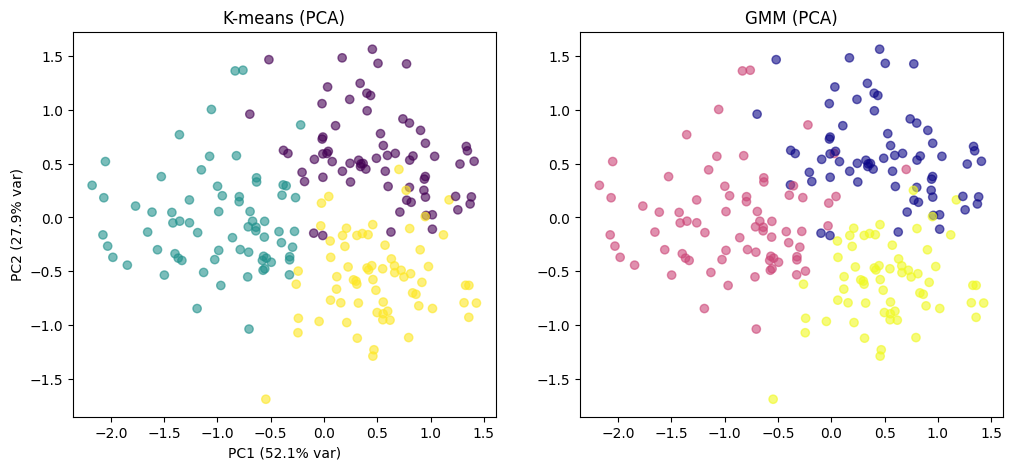

In [146]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, cmap='viridis', alpha=0.6)
plt.title('K-means (PCA)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} var)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} var)')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_gmm, cmap='plasma', alpha=0.6)
plt.title('GMM (PCA)')
plt.show()

Визуализации кластеров к пространстве главных компонент показало примерно одинаковое разделение на класстеры. Для каждого из алгоритмов оптимальным значением является 3. Однако метод k-means очерчивает жесткие границы между кластерами, в то время как GMM более плавные

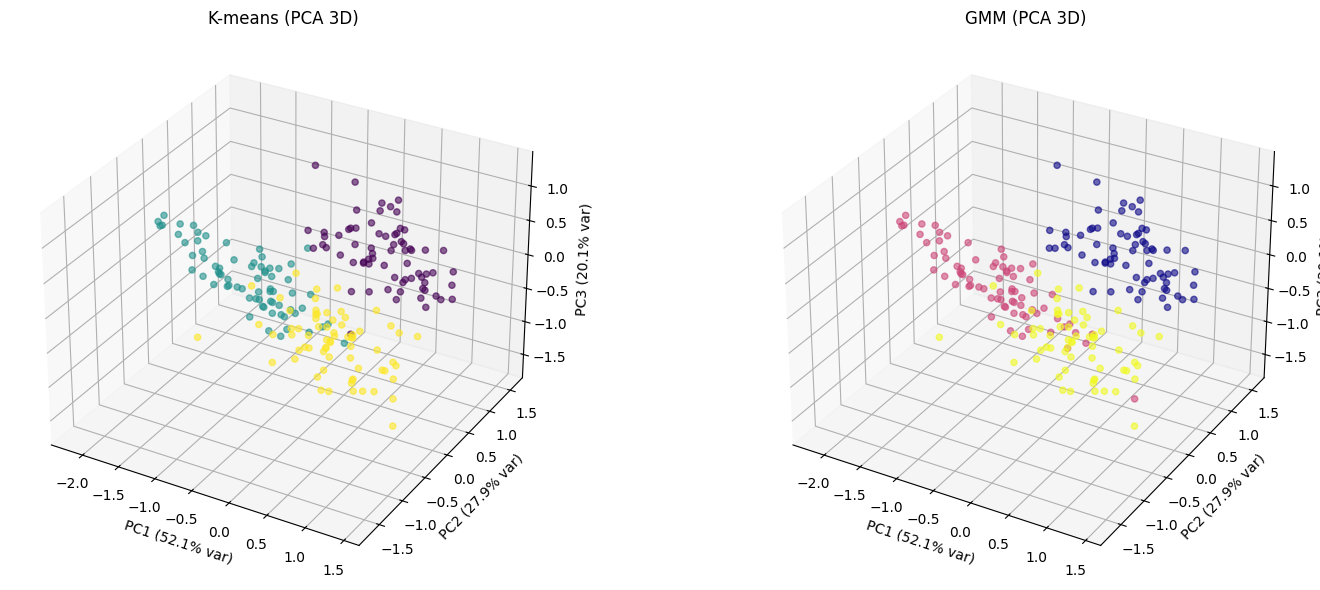

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

fig = plt.figure(figsize=(16, 6))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
scatter1 = ax1.scatter(
    X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
    c=labels_kmeans, cmap='viridis', alpha=0.6
)
ax1.set_title('K-means (PCA 3D)')
ax1.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} var)')
ax1.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} var)')
ax1.set_zlabel(f'PC3 ({pca.explained_variance_ratio_[2]:.1%} var)')

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
scatter2 = ax2.scatter(
    X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
    c=labels_gmm, cmap='plasma', alpha=0.6
)
ax2.set_title('GMM (PCA 3D)')
ax2.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} var)')
ax2.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} var)')
ax2.set_zlabel(f'PC3 ({pca.explained_variance_ratio_[2]:.1%} var)')

plt.tight_layout()
plt.show()

## Заключение
В ходе выполнения работы был проведна класстеризация датасета Seed_from_UCI. Для числовых признаков была построена матрица корреляции, на основе которой были отброшены сильно коррелирующие признаки, такие как A, P, LK, WK. Затем для оставшихся признаков была проведена станлартизация с использованием RobustScaler, что сравняло вклад каждого из параметров.
Визуальный анализ распределения диаграмм показал 2 хорошо разделимых группы.

Класстеризация была реализована 2 методами: k-means и GMM. Оба метода с k=3 выделили одинаковые группы. Отличие между результатами видно на границах кластеров: k-means очерчивает жесткие границы между кластерами, в то время как GMM более плавные.
На основе получившихся групп были выделены 
- Кластер 0: Это зерна, которые почти круглые, но имеют выраженную бороздку — это типичные зерна основного сорта, где бороздка развита, но форма сохранена.
- Кластер 1: Это зерна, неправильной формы (A_Coef самый высокий), бороздка меньше чем у кластера 1 - испорченные или аномальные зерна.
- Кластер 2: Округлые зерна, почти семметричные (A_Coef самый низкий), самая короткая бороздка - высший сорт, наиболее ценное зерно для переработки.

Анализ влияния параметров показал, что оптимальным значением является 3, при этом достигается наилучший баланс между компактностью групп, их разделимостью и практической полезностью сегментации.

В результате выполненения кластаризации было подтверждено 3 группы, отличающихся по симметрии и глубины бороздки

